In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
!pip install factor_analyzer

import warnings
warnings.filterwarnings("ignore")

# Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [129]:
#Reading the data
Ads_Data = pd.read_excel('Clustering Clean Ads_Data-1.xlsx')
Ads_Data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.00,0.35,0.0000,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.00,0.35,0.0000,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.00,0.35,0.0000,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.00,0.35,0.0000,0.0000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


In [130]:
#Checking object type, Null entries, Rows and Columns
Ads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [131]:
#Checking duplicate entries
Ads_Data.duplicated().sum()

0

In [132]:
#Checking Total null entries
Ads_Data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

## Q:2 Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Case Study to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing.

In [133]:
# Treating CPM
def calculate_cpm(x): 
    
    Spend = Ads_Data.Spend
    Impressions = Ads_Data.Impressions 
    cpm = ((Spend/Impressions)*1000)
    return cpm    

In [134]:
Ads_Data['CPM'] = Ads_Data[['CPM']].apply(lambda x: calculate_cpm(x))

In [135]:
# Treating CPC
def calculate_cpc(y): 
    
    Spend=Ads_Data.Spend
    Clicks=Ads_Data.Clicks 
    cpc = (Spend/Clicks)
    return cpc    

In [136]:
Ads_Data['CPC'] = Ads_Data[['CPC']].apply(lambda y: calculate_cpc(y))

In [137]:
# Treating CTR
def calculate_ctr(z): 
    
    Clicks=Ads_Data.Clicks
    Impressions=Ads_Data.Impressions 
    ctr = ((Clicks/Impressions)*100)
    return ctr 

In [138]:
Ads_Data['CTR'] = Ads_Data[['CTR']].apply(lambda z: calculate_ctr(z))

In [139]:
#Successfully imputed Null entries, But some entries couldn't be imputed because of inderminant form
Ads_Data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                       219
CPM                       219
CPC                      2586
dtype: int64

In [140]:
# Replacing infinity values with np.nan.

Ads_Data.replace([np.inf, -np.inf], np.NaN, inplace=True)

In [141]:
# Successfully replaced
Ads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [142]:
# Removing all inderminant Null values
Ads_Data1=Ads_Data.dropna()

In [143]:
Ads_Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23066 entries, 0 to 25854
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [144]:
#Removing columsn which is not required for clustering
Ads_Data1_num = Ads_Data1.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'], axis = 1)

In [145]:
Ads_Data1_num

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
10,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
24,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
50,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
53,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25848,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
25849,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
25851,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
25853,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


# Q 3 Check if there are any outliers.

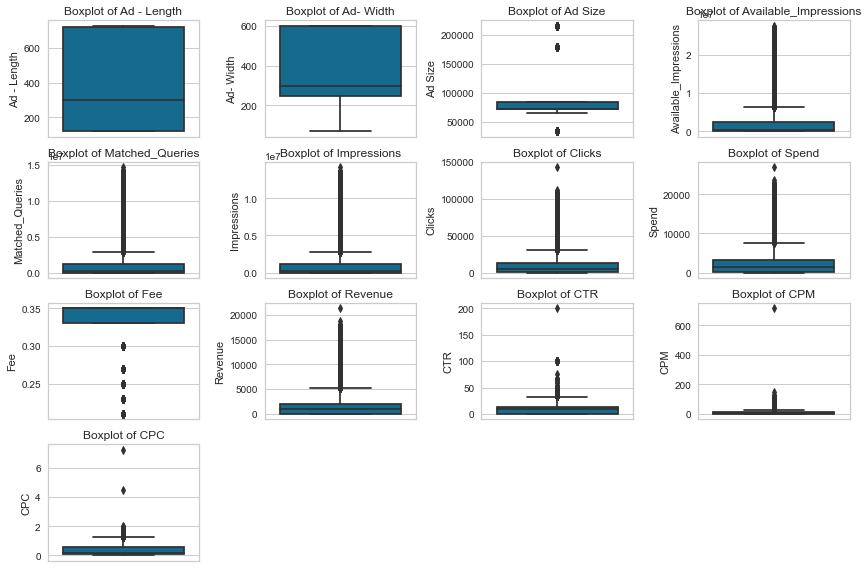

In [146]:
#Checking outliers
plt.figure(figsize=(12,8))
feature_list = Ads_Data1_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = Ads_Data1_num[feature_list[i]], data=Ads_Data1_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst)
Answer: yes, treating outliers is important because outliers are sensitive to clustering 

In [147]:
#Removing outliers 
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [148]:
for i in feature_list:
    LL, UL = remove_outlier(Ads_Data1_num[i])
    Ads_Data1_num[i] = np.where(Ads_Data1_num[i] > UL, UL, Ads_Data1_num[i])
    Ads_Data1_num[i] = np.where(Ads_Data1_num[i] < LL, LL, Ads_Data1_num[i])

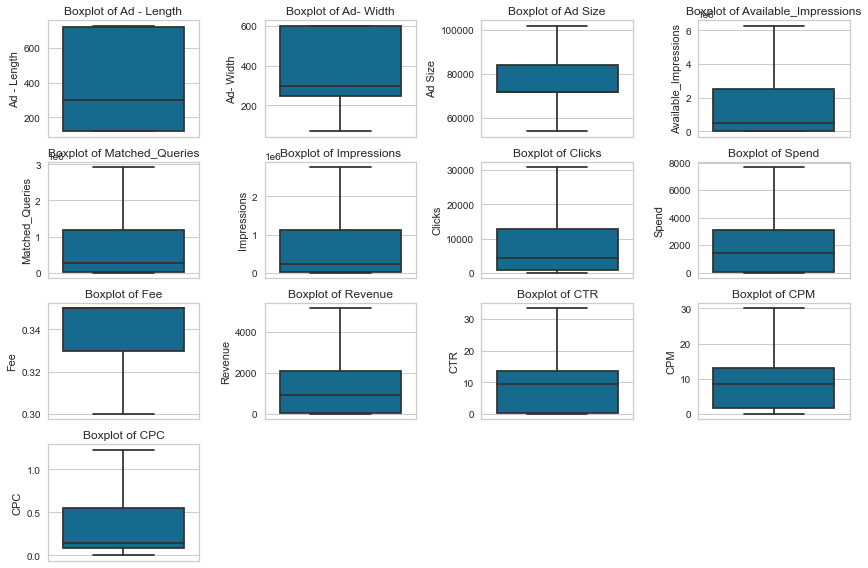

In [149]:
plt.figure(figsize=(12,8))
feature_list = Ads_Data1_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = Ads_Data1_num[feature_list[i]], data=Ads_Data1_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [150]:
Ads_Data1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.657684e+04,1.538132e+04,54000.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.402883e-01,1.812855e-02,0.300000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


# Perform z-score scaling and discuss how it affects the speed of the algorithm

In [151]:
## Scaling the data using the ZScore Scaling function

from scipy.stats import zscore

#apply the scaler to the data:
Ads_Data1_scaled =  Ads_Data1_num.apply(zscore)
Ads_Data1_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
10,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
24,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
50,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
53,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


# Perform clustering and do the following:

In [152]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [153]:
wardlink = linkage(Ads_Data1_scaled, method = 'ward', metric='euclidean')

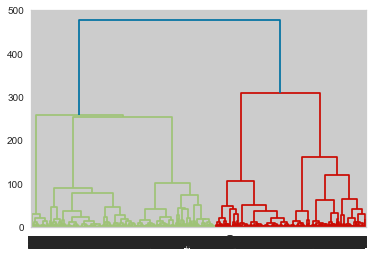

In [154]:
dend = dendrogram(wardlink)

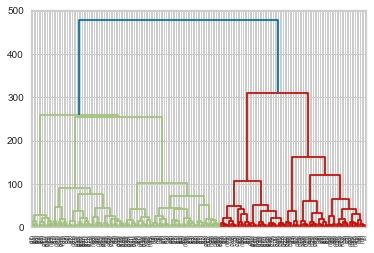

In [155]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 200,
                 )

# Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

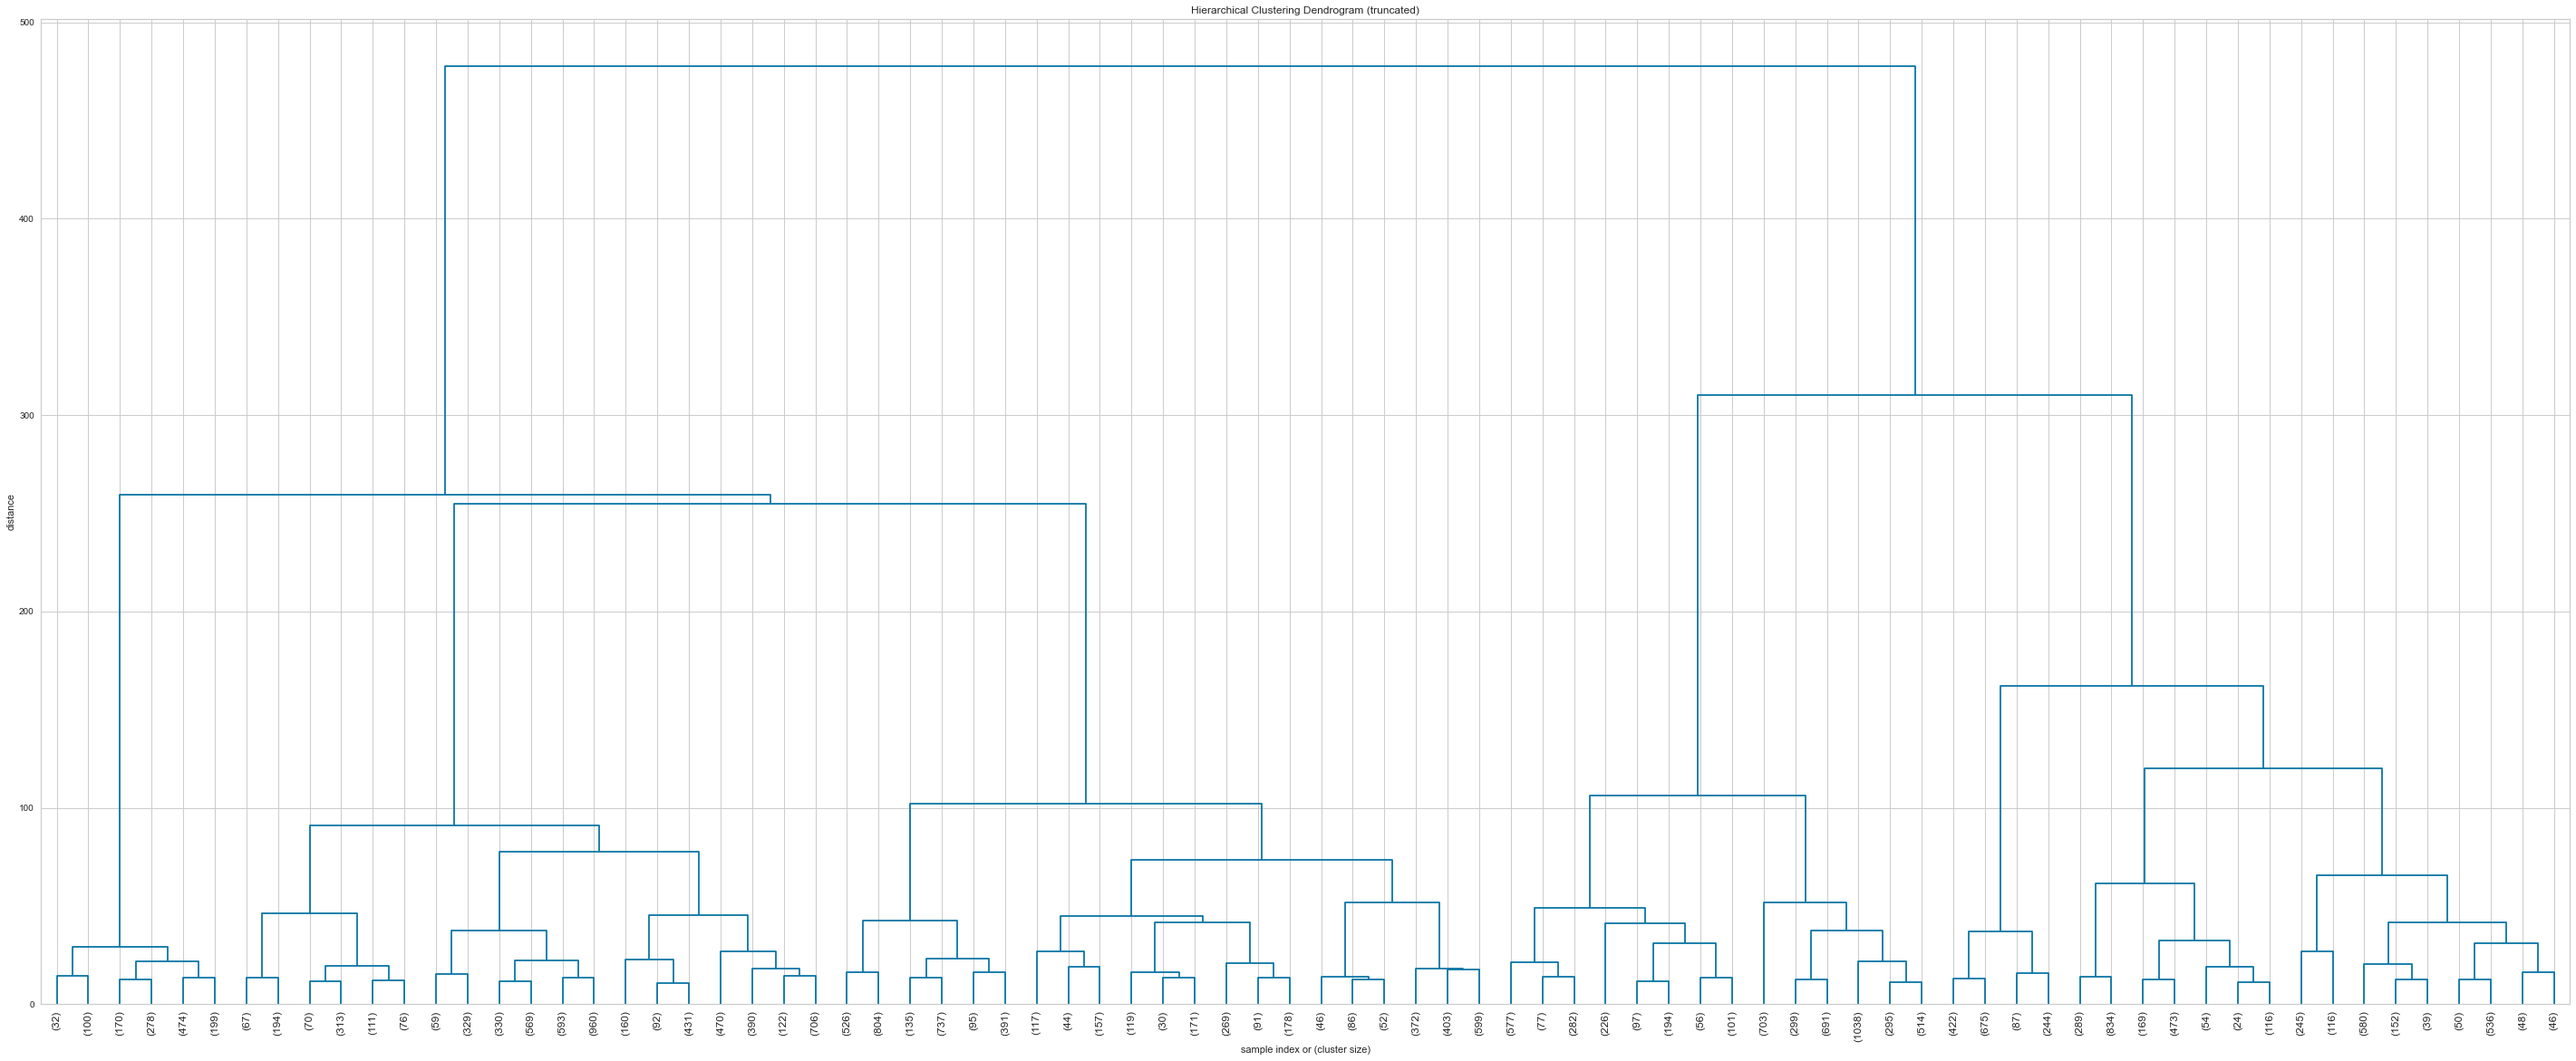

In [156]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(50, 20))
Z_Final = linkage(Ads_Data1_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

In [157]:
clusters_200 = shc.fcluster(shc.linkage(Ads_Data1_scaled, method='ward'),200 , criterion='distance')# here 10 is the value of color_threshold in the dendrogram
clusters_200

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [158]:
clusters_280 = shc.fcluster(shc.linkage(Ads_Data1_scaled, method='ward'),200 , criterion='distance')# here 10 is the value of color_threshold in the dendrogram
clusters_280

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [159]:
# Adding Column cluster_200 in data fram
Ads_Data1_num['cluster_200']= clusters_200
Ads_Data1_num.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster_200
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0,4
10,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0,4
24,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0,4
50,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0,4
53,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0,4


In [160]:
# Counting entries in each cluster
Ads_Data1_num['cluster_200'].value_counts()

2    6042
3    5422
5    5199
4    5150
1    1253
Name: cluster_200, dtype: int64

In [161]:
# on the basis of inertia taking decision for clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(Ads_Data1_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [162]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 183349.10202886097
The WSS value for 3 clusters is 130878.34240367354
The WSS value for 4 clusters is 95133.9448134987
The WSS value for 5 clusters is 61539.189197853884
The WSS value for 6 clusters is 51676.89681600461
The WSS value for 7 clusters is 44598.258497467905
The WSS value for 8 clusters is 39597.84813652192
The WSS value for 9 clusters is 36061.740167829914
The WSS value for 10 clusters is 33544.28161848274


# Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

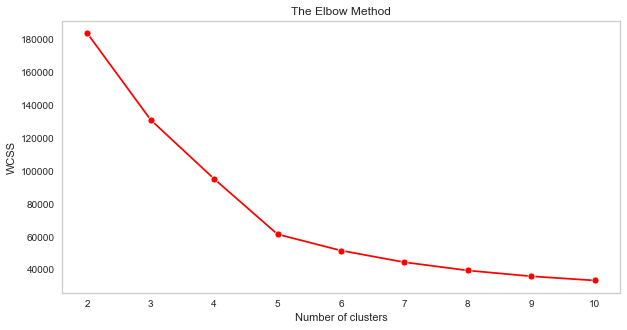

In [163]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [164]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(Ads_Data1_scaled,labels_5)
# More than 0.5 is much better silhouette score it means a well distinguished clustering is done

0.5240956940501831

In [165]:
from sklearn.metrics import silhouette_samples, silhouette_score
sill_score = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(Ads_Data1_scaled)
    sill_score.append(kmeans.labels_)

In [166]:
for sill_labels in range(1,12):
    sill_labels = sill_score
sill_labels

[array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([2, 2, 2, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 2, 2, 2]),
 array([1, 1, 1, ..., 3, 2, 3]),
 array([4, 4, 4, ..., 0, 3, 0]),
 array([1, 1, 1, ..., 0, 3, 0]),
 array([6, 6, 6, ..., 7, 0, 7]),
 array([0, 0, 0, ..., 6, 1, 6]),
 array([1, 1, 1, ..., 9, 0, 9]),
 array([3, 3, 3, ..., 9, 7, 9])]

In [167]:
for i in range(1,11):
    print('The Sill Score for',i,'clusters is',silhouette_score(Ads_Data1_scaled,sill_labels[i]))

The Sill Score for 1 clusters is 0.38572769619101077
The Sill Score for 2 clusters is 0.3825486036570082
The Sill Score for 3 clusters is 0.44534371698609754
The Sill Score for 4 clusters is 0.5240956940501831
The Sill Score for 5 clusters is 0.5221533662938636
The Sill Score for 6 clusters is 0.5165635029478517
The Sill Score for 7 clusters is 0.4797524035378018
The Sill Score for 8 clusters is 0.43186674723096125
The Sill Score for 9 clusters is 0.44462846563808417
The Sill Score for 10 clusters is 0.45728509161421904


In [168]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


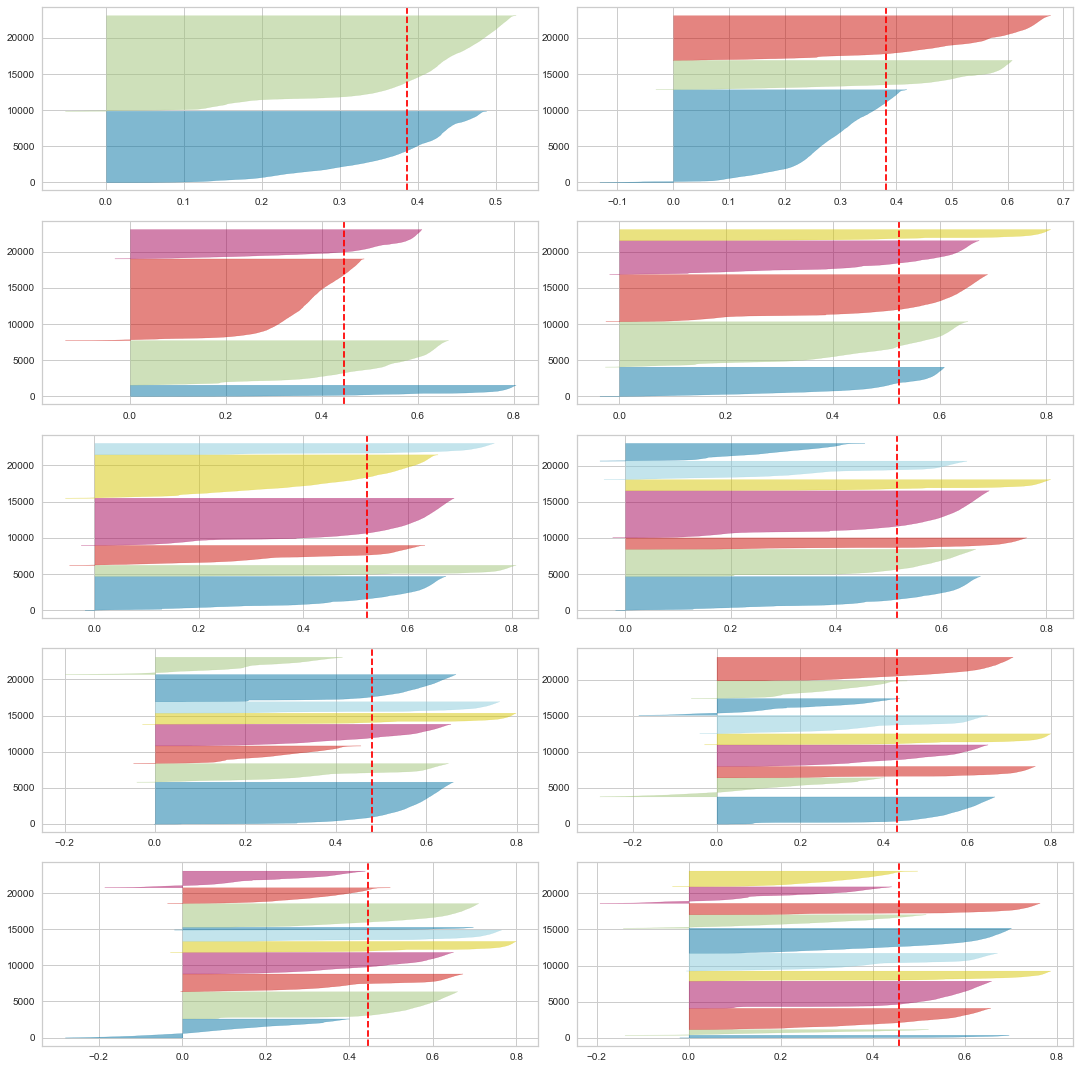

In [169]:
fig, ax = plt.subplots(5, 2, figsize=(15,15))
fig.tight_layout()
for i in [2, 3, 4, 5,6,7,8,9,10,11]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Ads_Data1_scaled)

In [170]:
# Based on above observation we are taking 5 clusters
Ads_Data1_scaled['Kmeans_5'] = labels_5
Ads_Data1_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Kmeans_5
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561,1
10,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561,1
24,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561,1
50,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561,1
53,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561,1


In [171]:
Ads_Data1_scaled['Kmeans_5'].value_counts()

2    6524
1    6275
3    4676
0    4054
4    1537
Name: Kmeans_5, dtype: int64

In [172]:
df_kmeans_5 = Ads_Data1_scaled
df_kclust_5 =  Ads_Data1_scaled.groupby('Kmeans_5').mean()
cluster_4_freq = Ads_Data1_scaled['Kmeans_5'].value_counts().sort_index()
df_kclust_5['cluster count'] = cluster_4_freq
df_kclust_5

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster count
Kmeans_5,,,,,,,,,,,,,,
0,0.345046,-0.683185,-0.234894,1.923400,1.955802,1.956321,0.306951,1.473429,-1.489814,1.475148,-0.970026,-0.965852,1.322538,4054
1,0.156361,-0.915337,-0.798183,0.095537,0.063083,0.074073,-0.526780,-0.274611,0.495111,-0.286585,-0.947351,-0.934541,0.625768,6275
2,-1.035250,1.153226,-0.169696,-0.741083,-0.760139,-0.755043,-0.667641,-0.806922,0.535048,-0.797516,0.916143,0.888098,-0.717936,6524
3,1.278267,-0.167960,1.573309,-0.637929,-0.645202,-0.649681,0.607907,-0.376793,0.510243,-0.384882,0.613871,0.510060,-0.758217,4676
4,-1.043065,1.154917,-0.187922,-0.376820,-0.226775,-0.281018,2.325494,1.806213,-1.915198,1.835245,0.669966,1.041522,-0.689019,1537


In [173]:
silhouette_samples(Ads_Data1_scaled,labels_5).min()

-0.00020858751529191606

In [174]:
sil_width=silhouette_samples(Ads_Data1_scaled,labels_5)

In [175]:
Ads_Data1_num["sil_width"] = sil_width
Ads_Data1_num.head(10)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster_200,sil_width
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0,0.309598,0.000000,0.00,4,0.177315
10,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.00,0.35,0.0,0.350877,0.000000,0.00,4,0.176760
24,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0,0.281690,0.000000,0.00,4,0.177717
50,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.00,0.35,0.0,0.202020,0.000000,0.00,4,0.178754
53,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.00,0.35,0.0,0.413223,0.000000,0.00,4,0.175891
86,300.0,250.0,75000.0,490.0,64.0,64.0,2.0,0.00,0.35,0.0,3.125000,0.000000,0.00,4,0.132725
88,300.0,250.0,75000.0,1197.0,202.0,202.0,1.0,0.01,0.35,0.0,0.495050,0.049505,0.01,4,0.178059
95,300.0,250.0,75000.0,1363.0,198.0,196.0,1.0,0.00,0.35,0.0,0.510204,0.000000,0.00,4,0.174545
152,300.0,250.0,75000.0,1402.0,137.0,136.0,1.0,0.00,0.35,0.0,0.735294,0.000000,0.00,4,0.171329
186,300.0,250.0,75000.0,1816.0,312.0,311.0,1.0,0.00,0.35,0.0,0.321543,0.000000,0.00,4,0.177156


In [176]:
Ads_Data1['Kmeans_5'] = labels_5
Ads_Data1['cluster_200'] = clusters_200
Ads_Data1['sil_width'] = sil_width
Ads_Data1.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Kmeans_5,cluster_200,sil_width
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,1,0.0,0.35,0.0,0.309598,0.0,0.0,1,4,0.177315
10,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,1,0.0,0.35,0.0,0.350877,0.0,0.0,1,4,0.176760
24,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,1,0.0,0.35,0.0,0.281690,0.0,0.0,1,4,0.177717
50,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,1,0.0,0.35,0.0,0.202020,0.0,0.0,1,4,0.178754
53,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,1,0.0,0.35,0.0,0.413223,0.0,0.0,1,4,0.175891


Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [177]:
Ad_Data_Mean = Ads_Data1.groupby(['Device Type','cluster_200'])['Clicks','Spend','Revenue','CPM','CTR','CPC','Device Type','Kmeans_5','cluster_200'].mean()
Ad_Data_Mean

Clicks        Spend      Revenue        CPM  \
Device Type cluster_200                                                      
Desktop     1            71686.146930  7602.611009  5498.218435  15.157941   
            2             3443.119147   380.899573   251.033256  14.679239   
            3            12891.169065  1115.317785   726.747997  12.398985   
            4             3258.727372  1231.849318   800.772569   1.782531   
            5             9580.749866  7354.112994  5373.367738   1.616326   
Mobile      1            71481.951066  7670.540928  5552.094863  15.248525   
            2             3534.177864   385.896597   254.378293  14.978210   
            3            12747.637514  1116.921016   727.722050  12.368627   
            4             3257.343185  1236.766577   804.006277   1.783221   
            5             9433.225990  7318.944568  5345.818105   1.633069   

                               CTR       CPC  Kmeans_5  cluster_200  
Device Type cluster_200                                              
Desktop     1            13.801457  0.109803  4.000000          1.0  
            2            16.084188  0.102192  2.082522          2.0  
            3            14.050985  0.091692  2.869476          3.0  
            4             0.449867  0.453324  1.005453          4.0  
            5             0.217398  0.793896  0.215319          5.0  
Mobile      1            13.758742  0.110726  4.000000          1.0  
            2            16.122166  0.102293  2.086486          2.0  
            3            13.989152  0.091975  2.872555          3.0  
            4             0.444314  0.457464  1.004524          4.0  
            5             0.216845  0.804611  0.222989          5.0

Average numner of Clicks based on clusters partitioned by Device type 

<AxesSubplot:xlabel='Kmeans_5', ylabel='Clicks'>

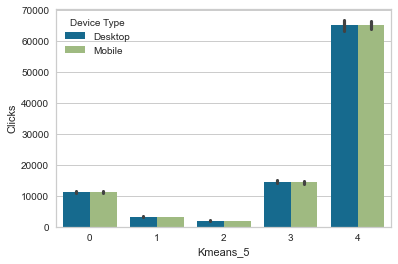

In [178]:
# Kmeans clustering

Ads_Data1.groupby('Kmeans_5', as_index=False)['Clicks'].mean()
sns.barplot(x = 'Kmeans_5', y = 'Clicks', data=Ads_Data1, hue = 'Device Type')

Average numner of Spends based on clusters partitioned by Device type 

<AxesSubplot:xlabel='Kmeans_5', ylabel='Spend'>

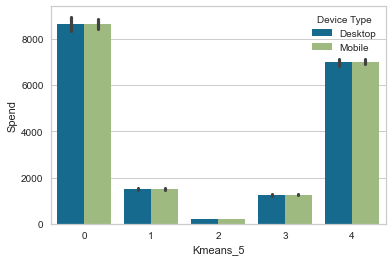

In [179]:
# Kmeans Clustering

Ads_Data1.groupby('Kmeans_5', as_index=False)['Spend'].mean()
sns.barplot(x = 'Kmeans_5', y = 'Spend', data=Ads_Data1, hue = 'Device Type')

Average numner of Revenue based on clusters partitioned by Device type 

<AxesSubplot:xlabel='Kmeans_5', ylabel='Revenue'>

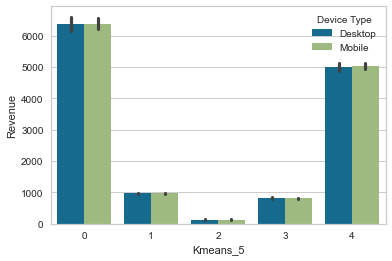

In [180]:
# Kmeans Clustering

Ads_Data1.groupby('Kmeans_5', as_index=False)['Revenue'].mean()
sns.barplot(x = 'Kmeans_5', y = 'Revenue', data=Ads_Data1, hue = 'Device Type')

<AxesSubplot:xlabel='Kmeans_5', ylabel='CTR'>

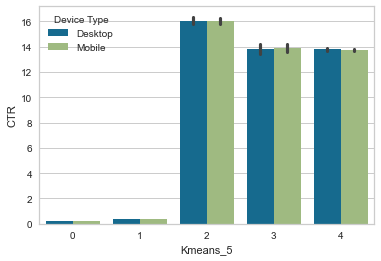

In [181]:
# Kmeans Clustering

Ads_Data1.groupby('Kmeans_5', as_index=False)['CTR'].mean()
sns.barplot(x = 'Kmeans_5', y = 'CTR', data=Ads_Data1, hue = 'Device Type')

Average numner of CPC based on clusters partitioned by Device type 

<AxesSubplot:xlabel='Kmeans_5', ylabel='CPC'>

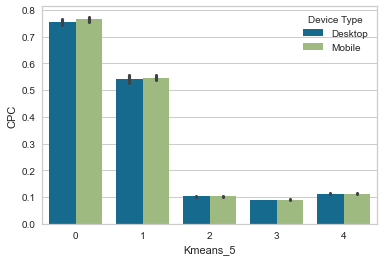

In [182]:
# Kmeans Clustering

Ads_Data1.groupby('Kmeans_5', as_index=False)['CPC'].mean()
sns.barplot(x = 'Kmeans_5', y = 'CPC', data=Ads_Data1, hue = 'Device Type')

Average numner of CPM based on clusters partitioned by Device type 

<AxesSubplot:xlabel='Kmeans_5', ylabel='CPM'>

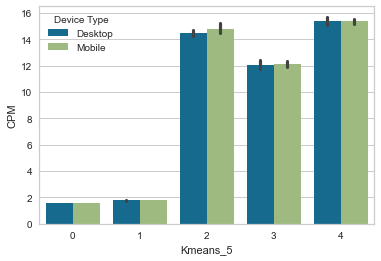

In [186]:
Ads_Data1.groupby('Kmeans_5', as_index=False)['CPM'].mean()
sns.barplot(x = 'Kmeans_5', y = 'CPM',data=Ads_Data1, hue = 'Device Type')

# Problem 2

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Question: 1 PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.¶

In [188]:
df= pd.read_excel('PCA+India+Data_Census.xlsx')
df.head(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [190]:
df.duplicated().sum()

0

In [191]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

## Answer1 :
Comments : We read the data.

1. There is no null entries
2. No Duplicates.
3. There are two object type columns and 59 columns are continuous variables.

## PCA: Perform detailed Exploratory analysis by creating certain questions like the given example. Pick 5 variables out of the given 20 variables below

Part1  - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [192]:
#Finding out the Gender Ratio:
df['Gender Ratio'] = df["TOT_M"]/df["TOT_F"]*100
df


,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,Gender Ratio
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,749,180,237,680,252,32,46,258,214,78.493758
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,715,123,229,186,148,76,178,140,160,84.776210
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,188,44,89,3,34,0,4,67,61,59.704487
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,247,61,128,13,50,4,10,116,59,66.191155
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,1928,465,1043,205,302,24,105,180,478,68.680164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,47,0,0,0,0,0,0,32,47,69.213140
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,337,3,14,38,130,4,23,110,170,56.917616
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,134,9,4,2,6,17,47,76,77,58.897338
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,172,24,44,11,21,1,4,100,103,64.902646


In [193]:
# sorting the gender ration is descending order Area wise
df.groupby('Area Name')[['Gender Ratio']].sum().sort_values(by='Gender Ratio',ascending=False)

,Gender Ratio
Area Name,
Aurangabad,138.055960
Hamirpur,134.337925
Bilaspur,124.788350
Bijapur,115.849094
Raigarh,104.077246
...,...
Baudh,45.145505
West Godavari,45.007568
Virudhunagar,44.935161


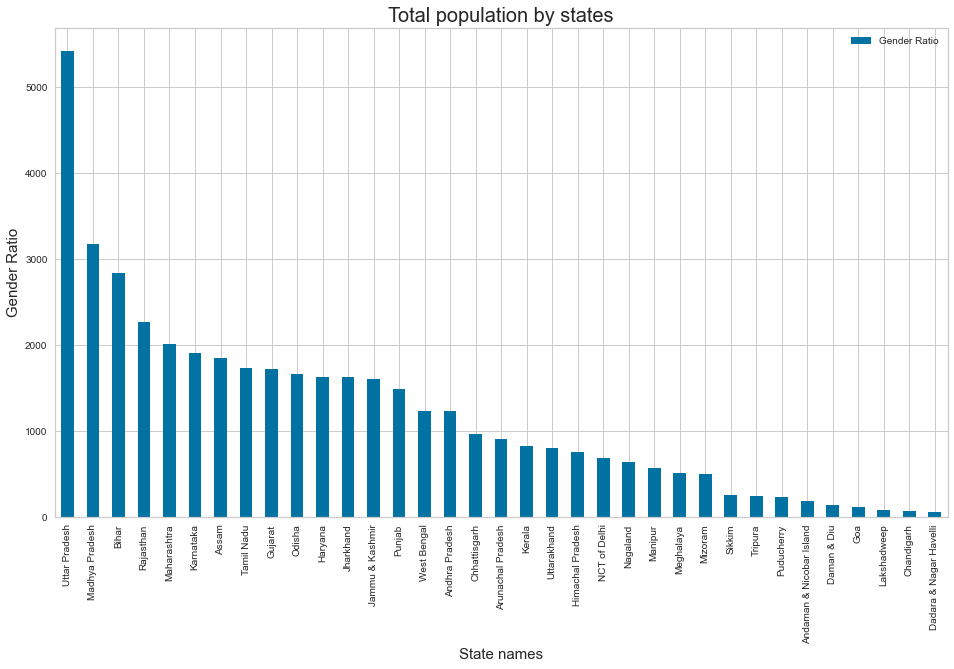

In [194]:
df.groupby('State')[['Gender Ratio']].sum().sort_values(by='Gender Ratio',ascending=False).plot.bar(figsize=(16,9))
plt.title('Total population by states',fontsize=20)
plt.xlabel('State names',fontsize=15)
plt.ylabel('Gender Ratio',fontsize=15)
plt.show()

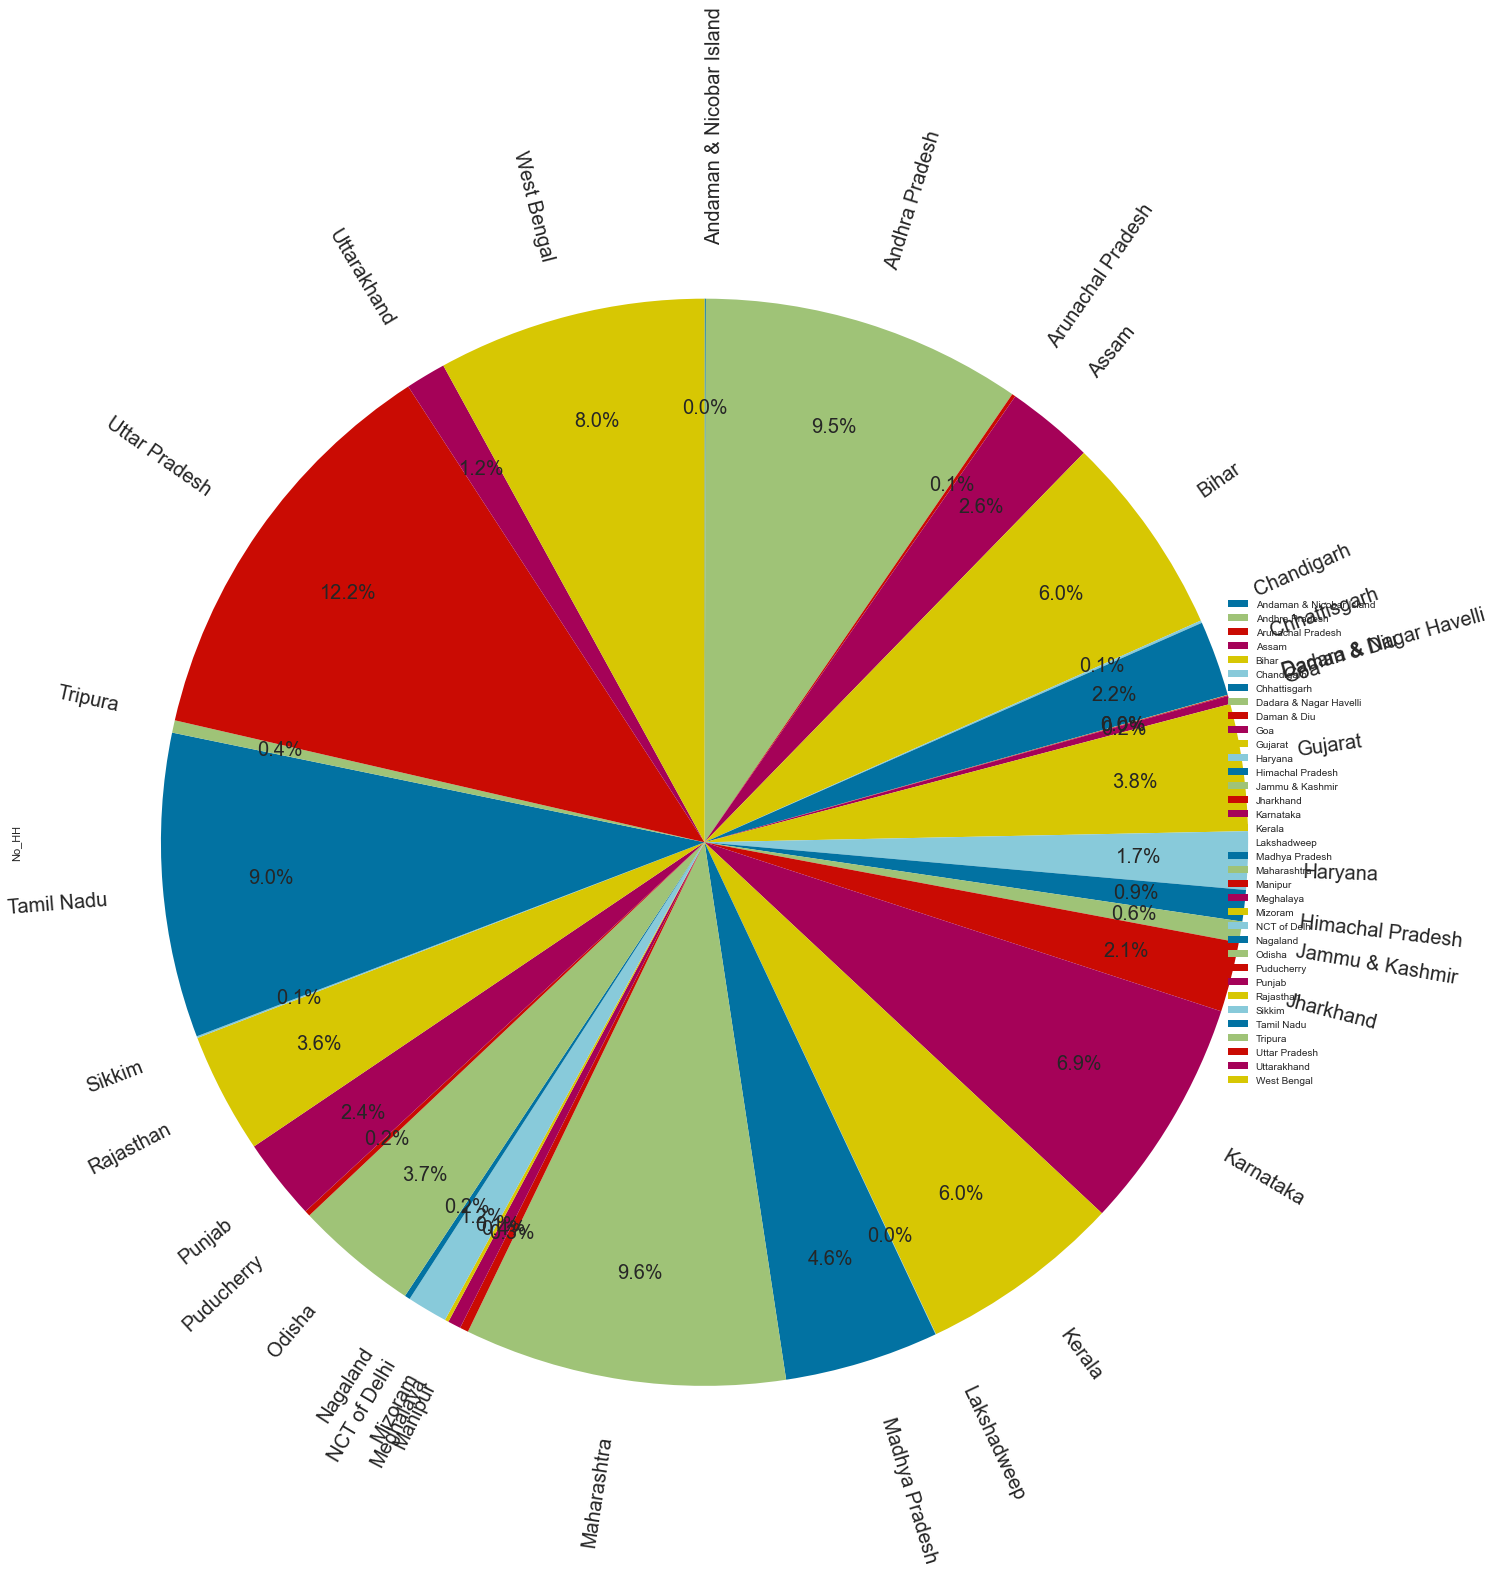

In [195]:
## Total Worker Population "State Wise"
df.groupby('State')[['No_HH']].sum().plot.pie(autopct='%1.1f%%',subplots=True,figsize=(30,25),
rotatelabels=True,fontsize=20,pctdistance=0.8,startangle=90,normalize=True,wedgeprops = {'linewidth': 5},counterclock=False)
plt.legend(loc="center right", fontsize=10)
plt.show()

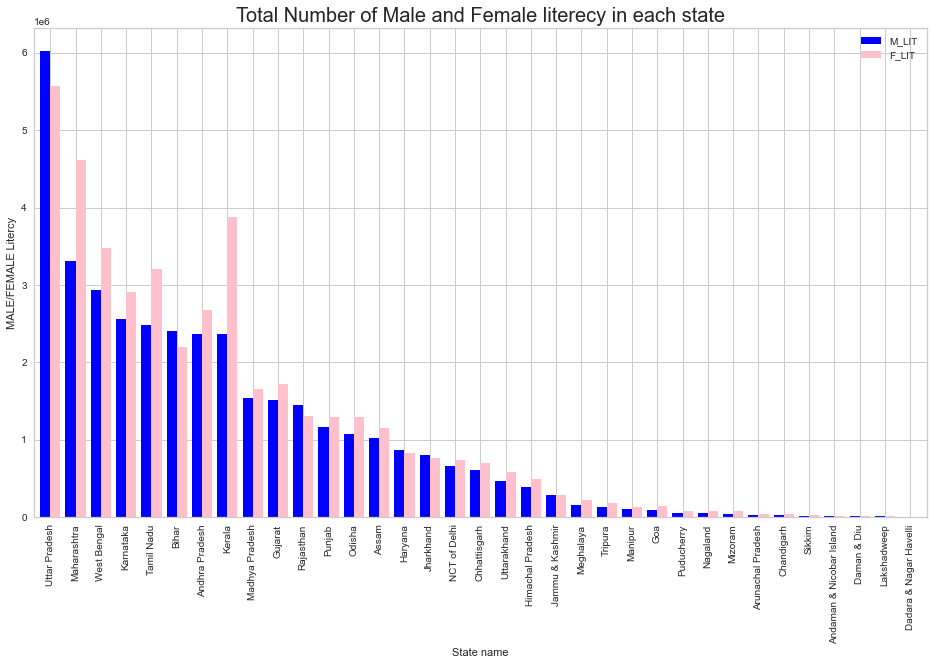

In [196]:
df.groupby('State')['M_LIT','F_LIT'].sum().sort_values(by=['M_LIT','F_LIT'],ascending=False).plot.bar(figsize=(16,9),
width=0.8,color=['Blue','pink'])
plt.title('Total Number of Male and Female literecy in each state',fontsize=20)
plt.xlabel('State name')
plt.ylabel('MALE/FEMALE Litercy')
plt.show()

## Answer : 2 EDA

Comments: 
1. Added Gender Ratio column and came up with the output that Aurangabad	has the highest Gender Ratio - 138.055960

2. Analysing State wise using bar plot and observed that Uttarpradesh has highest Gender ratio Value.

3. Using Pyplot coming to the conclusion that Uttarpradesh has greatest percentage of Number of households like 12.2% because of this reason Gender ration is highest in Uttarpradesh.

4. Literacy rate is highest in uttarpradesh and Male literacy is higher than female literacy in UP.

5. At the same time the Bottom 4 state in literacy is  Andaman and Nicobar Island, Daman and Diu, Lakshadweep, Dadra and Nagar Havelli

## PCA 

In [197]:
# Dropping Columns which is not required for PCA
df_pca = df.drop(['State Code', 'Dist.Code', 'State', 'Area Name','Gender Ratio'], axis = 1)
df_pca.head(10)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
5,16345,25290,37426,6155,5294,2588,4000,7796,11111,16471,...,1808,3536,1277,2374,229,256,19,71,283,835
6,12510,22793,30491,3928,3200,5357,6906,988,1311,16735,...,502,561,160,283,133,120,11,19,198,139
7,9414,22960,30509,4246,4099,0,0,945,1180,14692,...,849,878,168,321,385,265,50,94,246,198
8,3814,10319,13058,1646,1779,0,0,1749,2308,5820,...,515,901,108,280,218,234,49,144,140,243
9,15095,39014,52278,6269,5704,11,3,200,237,25837,...,308,432,10,29,36,22,16,134,246,247


In [198]:
len(df_pca.columns)

57

## We choose not to treat outliers for this case. Do you think that treating outliers for this case is necesbsary?

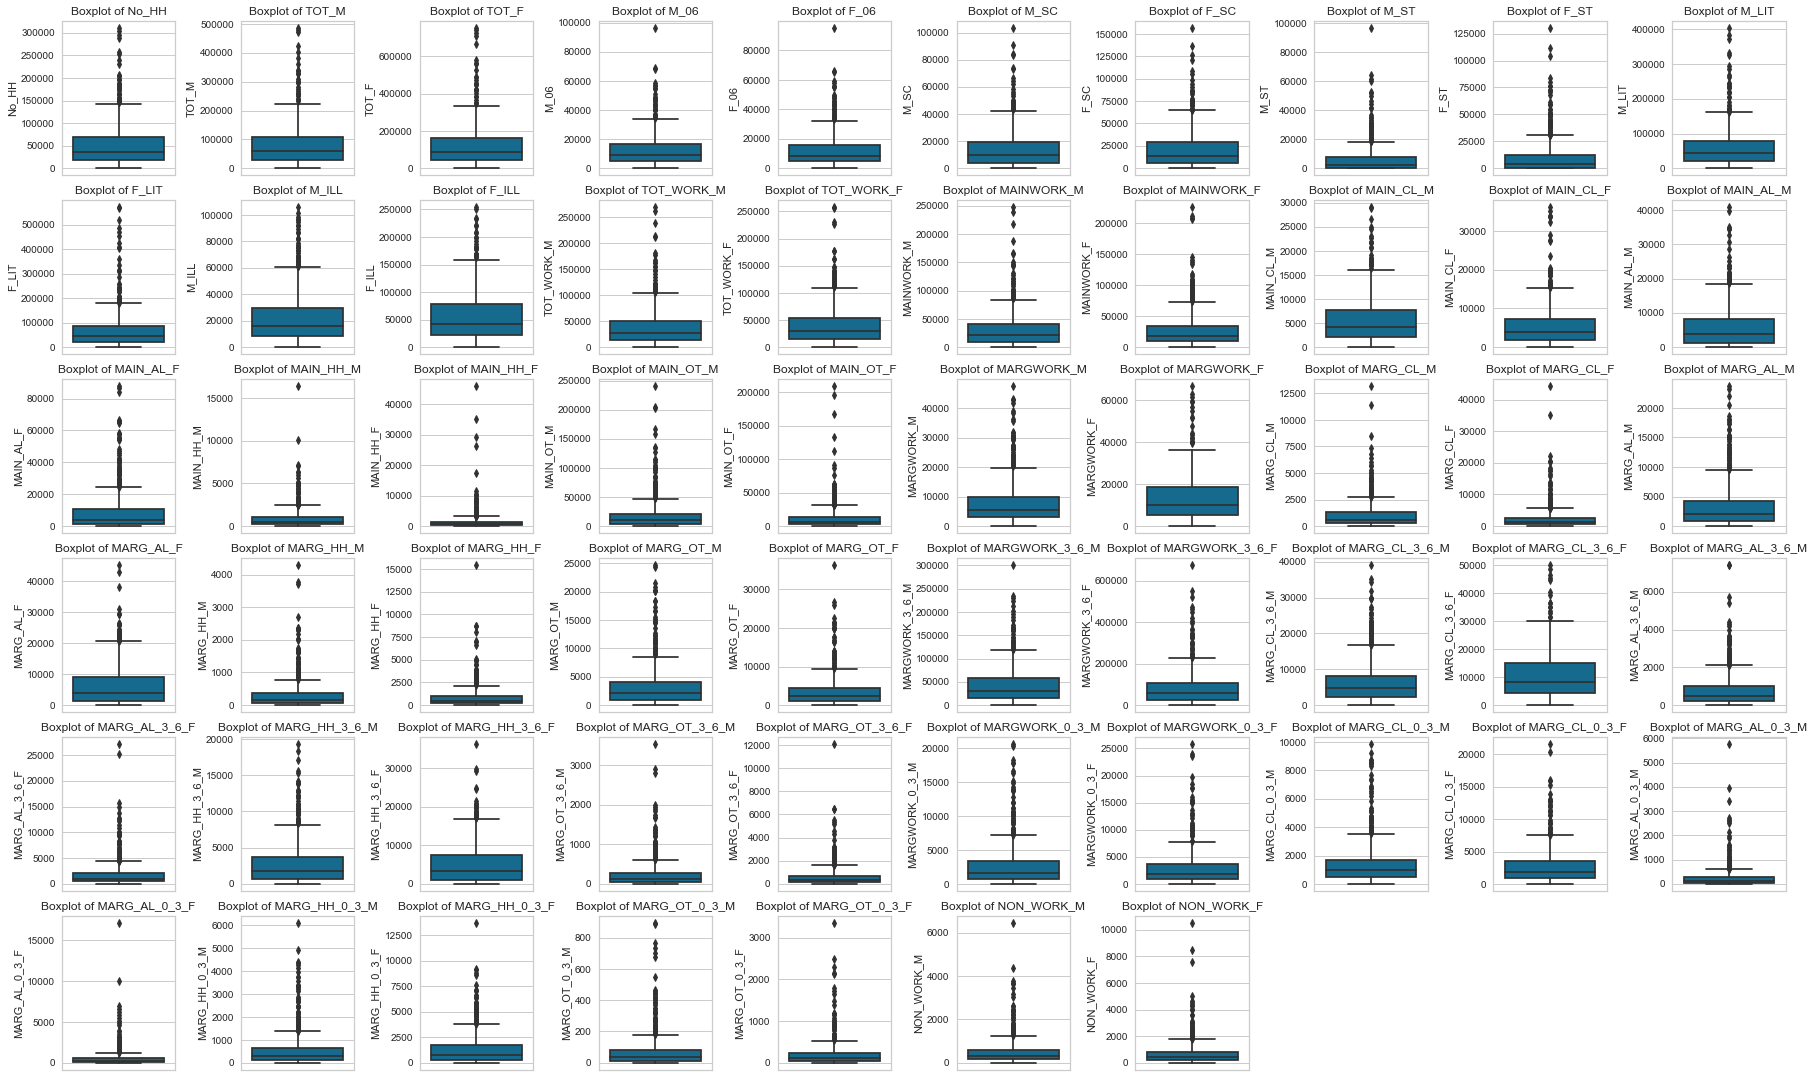

In [199]:
#Check for presence of outliers in each feature
plt.figure(figsize = (25,25))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Answer:  2
We are not treating outliers as our opinion that for dimensionality reduction treating outliers is not mandatory and
as without treating outliers calculating bartlett sphericity through factor analysis and getting 0.0 and finding out KMo_Model 
which is 0.8039889932781237. It means we are good to go for PCA

## Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [200]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [201]:
#Check the data post scaling
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


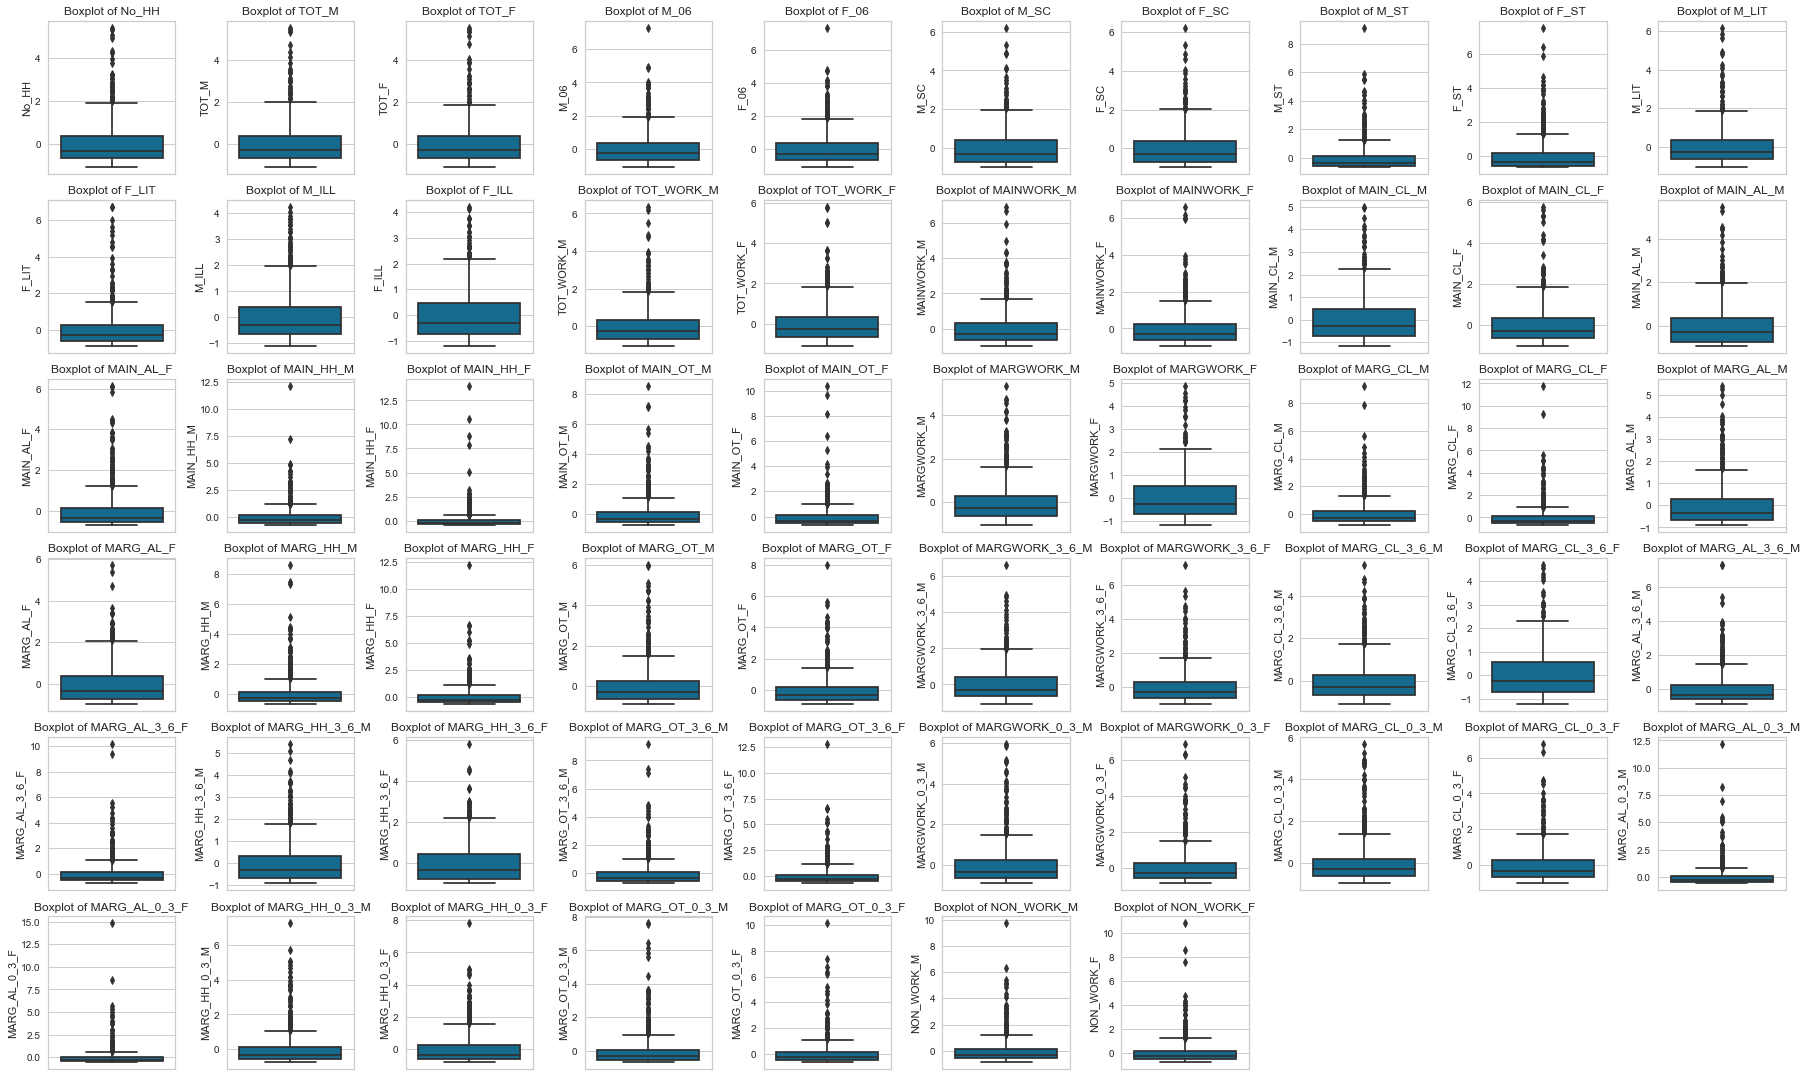

In [202]:
plt.figure(figsize = (25,25))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Answer: There is no impact on outliers after applying Z-score.

# Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

### Some Prerequisites are surely required to check wheather we should go for PCA or not.

In [203]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [204]:
#Good to Go for PCA after this value
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8039889932781237

### Answer: Since P_value is 0 there is significant co-orrelation between the data


## Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

CAlculating PCA componenets 

In [205]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [206]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [-0.        , -0.17278849, -0.09520952, ...,  0.00987322,
        -0.04362296, -0.0207041 ],
       [-0.        , -0.0116324 , -0.0814326 , ...,  0.04647201,
        -0.17212428,  0.03763315],
       [ 0.        ,  0.18260602,  0.03874463, ..., -0.00370238,
        -0.05681626, -0.03729932]])

In [207]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [208]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [209]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                                               'PC19','PC20', 'PC21', 'PC22', 'PC23', 'PC24',
                                               'PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                               'PC31','PC32', 'PC33', 'PC34', 'PC35', 'PC36',
                                               'PC37','PC38', 'PC39', 'PC40', 'PC41', 'PC42',
                                               'PC43','PC44', 'PC45', 'PC46', 'PC47', 'PC48',
                                               'PC49','PC50', 'PC51', 'PC52', 'PC53', 'PC54',
                                               'PC55','PC56', 'PC57'],
                                    index = df_pca_scaled.columns)

In [210]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,1.790399e-01,2.116730e-01,-8.102590e-02,2.134714e-02,5.997863e-02,-1.346169e-01,-8.916366e-02,-1.727885e-01,-1.163240e-02,1.826060e-01
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,3.049004e-01,3.599700e-01,-5.161556e-01,3.162317e-01,7.458124e-02,2.244617e-01,1.163855e-02,-9.520952e-02,-8.143260e-02,3.874463e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,1.128224e-15,1.236131e-15,-2.437023e-15,-3.881605e-16,-2.204057e-15,-7.092846e-16,1.806623e-15,-4.634998e-16,8.556932e-16,1.678060e-17
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,-3.053702e-16,-1.127955e-15,1.935852e-15,-2.310314e-16,2.616085e-15,5.302943e-16,-1.328301e-15,5.786993e-16,-2.470046e-16,3.410647e-16
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,-1.946360e-15,-2.317591e-15,1.004405e-15,-1.537046e-15,-1.605487e-15,5.516421e-16,3.382711e-16,1.356554e-15,2.594062e-15,-1.578598e-15
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,2.161504e-15,2.347179e-15,-1.077155e-15,1.762324e-15,1.554672e-15,-7.695957e-16,-3.306910e-16,-1.345778e-15,-2.857240e-15,1.414827e-15
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,2.576064e-16,6.834810e-16,3.365364e-16,3.690624e-16,2.814589e-16,-6.245005e-17,7.979728e-17,4.484260e-16,3.292722e-16,-3.226586e-16
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,-7.979728e-17,-5.429684e-16,-4.145989e-16,-3.885781e-16,-2.432950e-16,1.148712e-16,-1.474515e-16,-3.243933e-16,-4.427882e-16,3.269954e-16
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,-2.403377e-02,-2.298470e-01,1.799804e-02,3.454980e-02,6.417461e-04,-1.147567e-01,-1.393562e-02,-3.532632e-01,4.256257e-02,7.258125e-02


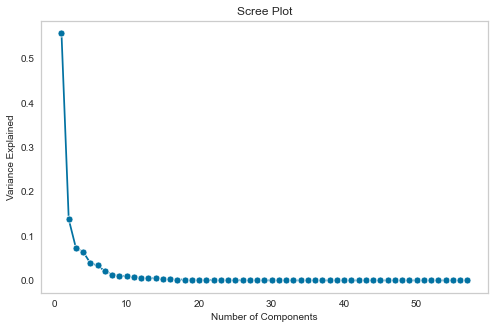

In [211]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [212]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [213]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]
df_selected.head()

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436


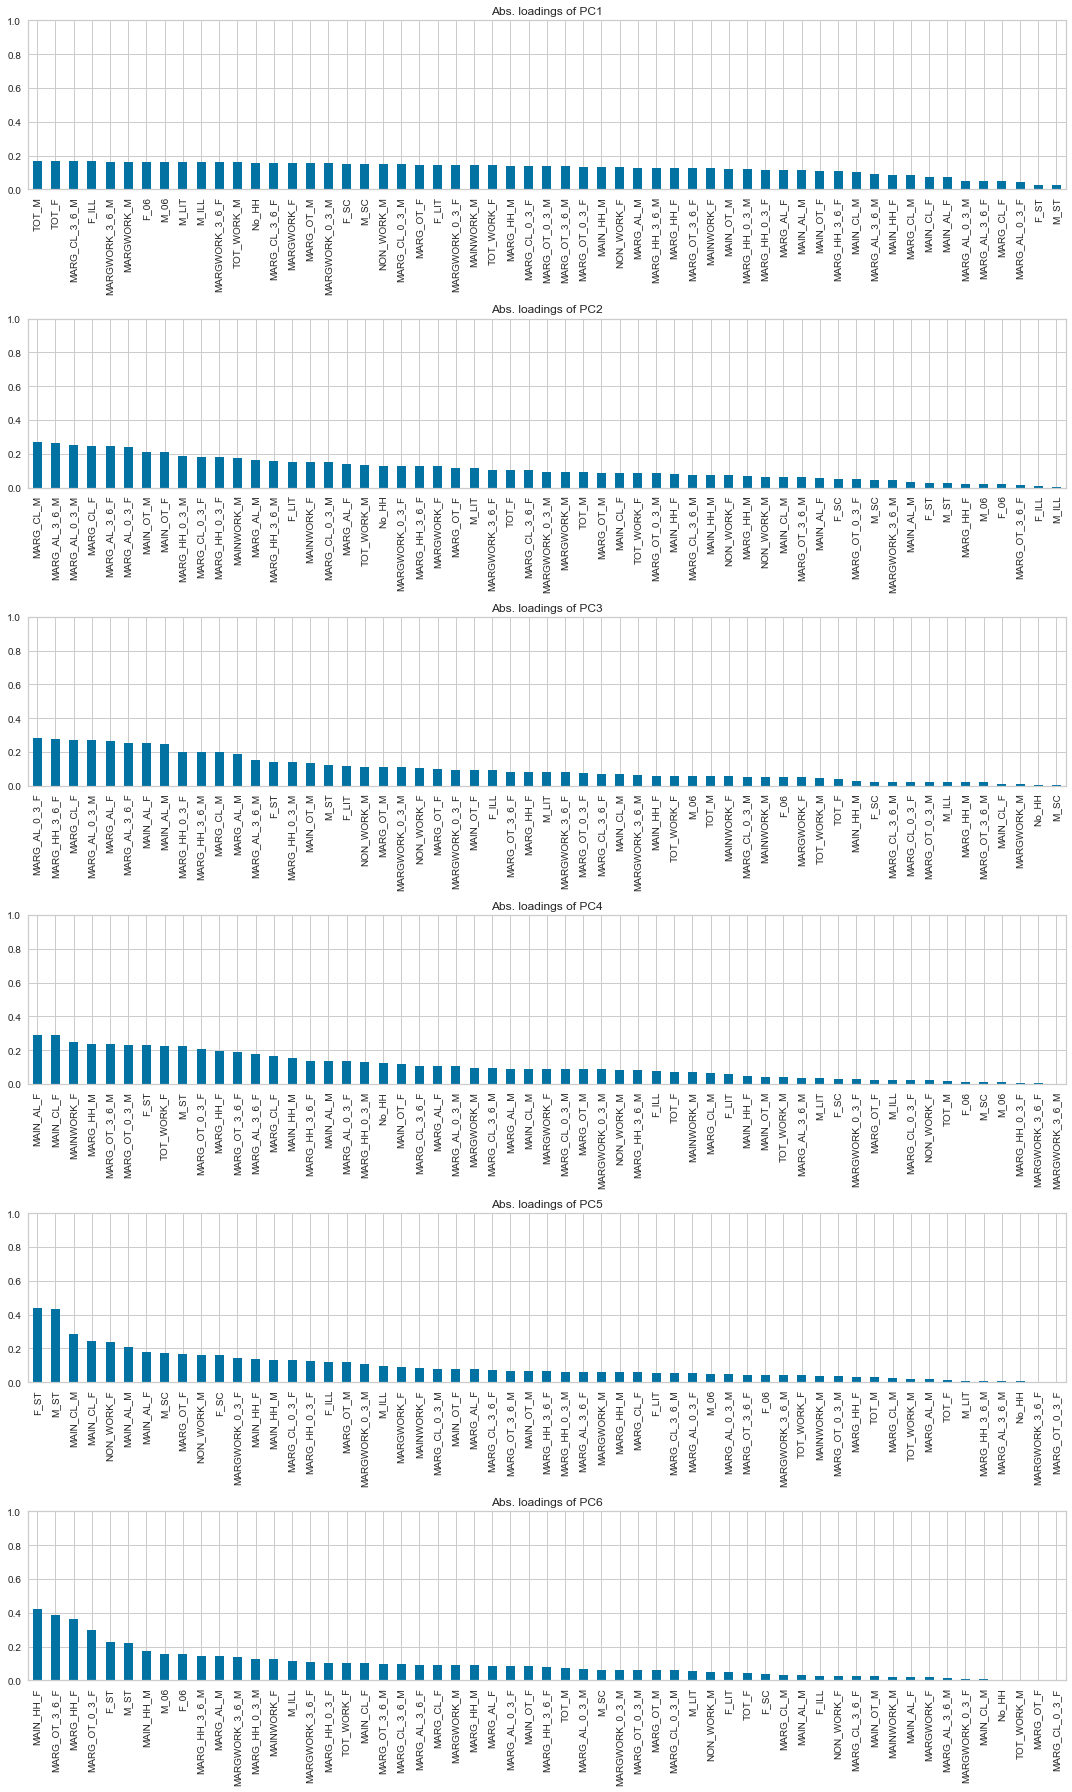

In [214]:
;
'x'#Note: Here we are only considering the absolute values
plt.figure(figsize = (15,25))
for i in range(len(df_selected.columns)):
    plt.subplot(6,1,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

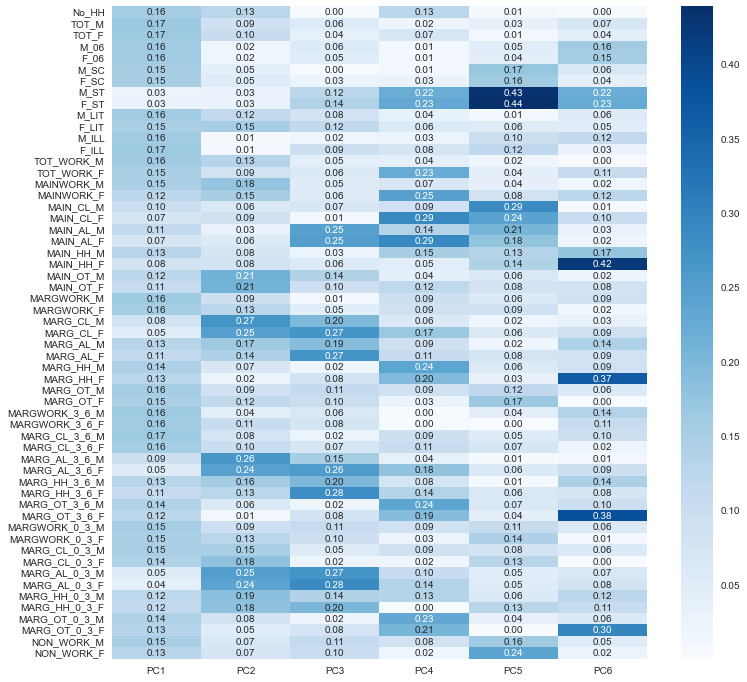

In [215]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,12))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [216]:
#In order to calculate PC scores we need loadings, below:
df_selected.head()


,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436


In [217]:
df_pca_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [218]:
##Write linear equation for first PC
pc_score = np.dot(df_selected['PC1'], df_pca_scaled.iloc[0])
print(round(pc_score,6), end = ' ')

-4.617263 

In [219]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [220]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678


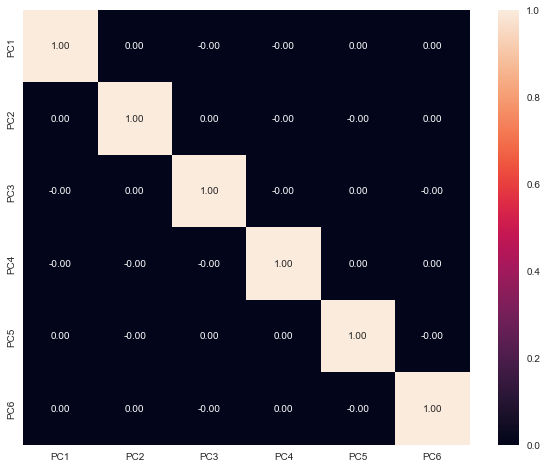

In [221]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

### Now, we see that the correlation amongst the variables have been decreased.

Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.